Fig. 4, 5, 6 and Supplement Fig. 3 and 4

In [1]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from open_atmos_jupyter_utils import show_plot
from matplotlib import pyplot

In [2]:
# General settings
hom_freezing_types     = [  "KoopMurray2016", "Spichtinger2023" ]
hom_freezing_labels    = [      "KM16",             "SP23"]
number_of_nsd = (1e2, 1e3, 1e4)
vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second
number_concentrations = np.geomspace(100, 20000, num=10) / si.cm ** 3

backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()


In [5]:
# Simulations for n_sd ensemble with deposition
nsd_ensemble_deposition = {}
nsd_ensemble_deposition["ens_variable"] = number_of_nsd
nsd_ensemble_deposition["ens_variable_name"] = "n_sd"
nsd_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
nsd_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    nsd_ensemble_deposition[hom_freezing_type] = []
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": True,
            }
        nsd_ensemble_deposition[hom_freezing_type].append( run_simulations(setting_dict) )

In [6]:
# Simulations for updraft histogram with deposition
updraft_ensemble_deposition = {}
updraft_ensemble_deposition["ens_variable"] = vertical_updrafts
updraft_ensemble_deposition["ens_variable_name"] = "w_updraft"
updraft_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
updraft_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    updraft_ensemble_deposition[hom_freezing_type] = []
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 1,
            }

        updraft_ensemble_deposition[hom_freezing_type].append( run_simulations(setting_dict) )

In [7]:
# Simulations for CCN concentration histogram
ccn_ensemble_deposition = {}
ccn_ensemble_deposition["ens_variable"] = number_concentrations
ccn_ensemble_deposition["ens_variable_name"] = "n_ccn"
ccn_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
ccn_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    ccn_ensemble_deposition[hom_freezing_type] = []
    for n_dv in number_concentrations:
        setting_dict = {
            **standard,
            "n_sd": int(1e4),
            "n_ccn": n_dv,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
        }
        ccn_ensemble_deposition[hom_freezing_type].append(run_simulations(setting_dict))

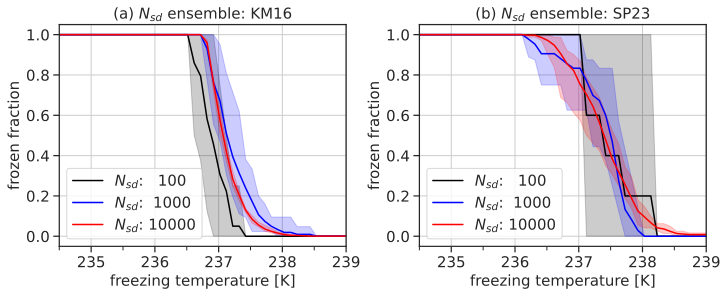

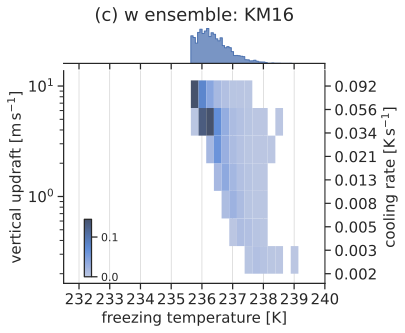

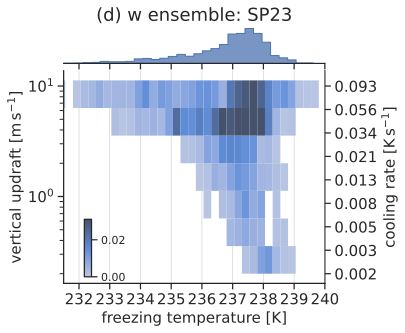

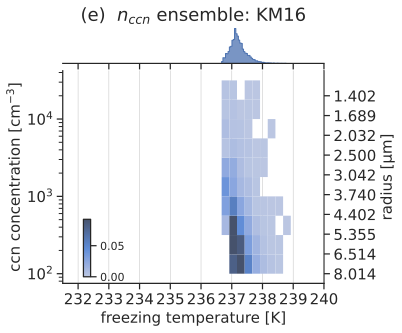

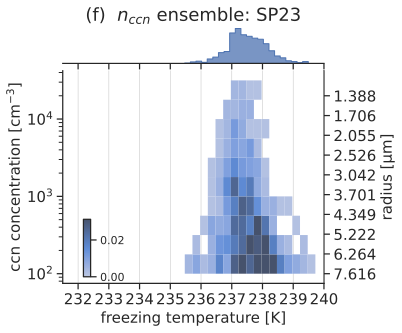

In [88]:
# Plot Figure 4
reload(plot)
fig_name = "fig4_"
fig, axs = pyplot.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

axs = axs.ravel()

axs[0] = plot.plot_freezing_temperatures_histogram_allinone(axs[0], nsd_ensemble_deposition["KoopMurray2016"], title = r"(a) $N_{sd}$ ensemble: KM16", lloc="lower left")
axs[1] = plot.plot_freezing_temperatures_histogram_allinone(axs[1], nsd_ensemble_deposition["Spichtinger2023"], title = r"(b) $N_{sd}$ ensemble: SP23", lloc="lower left")
show_plot(fig_name+"ab")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_deposition, "KoopMurray2016", title = "(c) w ensemble: KM16")
show_plot(fig_name+"c")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_deposition, "Spichtinger2023", title = "(d) w ensemble: SP23")
show_plot(fig_name+"d")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_deposition, "KoopMurray2016", title = r"(e)  $n_{ccn}$ ensemble: KM16")
show_plot(fig_name+"e")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_deposition, "Spichtinger2023", title = r"(f)  $n_{ccn}$ ensemble: SP23")
show_plot(fig_name+"f")

In [27]:
# General settings for simulations with log-normal distribution
hom_freezing_types     = [  "KoopMurray2016" ]

number_of_nsd = (1e2, 1e3, 1e4)
vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second
number_concentrations = np.geomspace(100, 20000, num=10) / si.cm ** 3
sigmas = np.linspace( 1.5, 2., num=6)

backends = hom_pure_droplet_freezing_backend()
standard_sig = hom_pure_droplet_freezing_standard_setup()
standard_sig["type_droplet_distribution"] = "lognormal"
standard_sig["sigma_droplet_distribution"] = 2.0
standard_sig["r_ccn"] =  0.05e-6
standard_sig["n_sd"] =  int(1e4)

hom_freezing_labels  = [ r"KM16: $\sigma=$"+str(standard_sig["sigma_droplet_distribution"]) ]

In [16]:
# Simulations for n_sd ensemble with deposition
nsd_ensemble_deposition_sig = {}
nsd_ensemble_deposition_sig["ens_variable"] = number_of_nsd
nsd_ensemble_deposition_sig["ens_variable_name"] = "n_sd"
nsd_ensemble_deposition_sig["hom_freezing_types"] = hom_freezing_types
nsd_ensemble_deposition_sig["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    nsd_ensemble_deposition_sig[hom_freezing_type] = []
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard_sig,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": True,
            }
        nsd_ensemble_deposition_sig[hom_freezing_type].append( run_simulations(setting_dict) )

In [17]:
#  Simulations for n_sd ensemble without deposition
nsd_ensemble_no_deposition_sig = {}
nsd_ensemble_no_deposition_sig["ens_variable"] = number_of_nsd
nsd_ensemble_no_deposition_sig["ens_variable_name"] = "n_sd"
nsd_ensemble_no_deposition_sig["hom_freezing_types"] = hom_freezing_types

for hom_freezing_type in hom_freezing_types:
    nsd_ensemble_no_deposition_sig[hom_freezing_type] = []
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard_sig,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": False,
        }
        nsd_ensemble_no_deposition_sig[hom_freezing_type].append(run_simulations(setting_dict))

In [29]:
# Updraft ensemble simulations without deposition
updraft_ensemble_no_deposition_sig = {}
updraft_ensemble_no_deposition_sig["ens_variable"] = vertical_updrafts
updraft_ensemble_no_deposition_sig["ens_variable_name"] = "w_updraft"
updraft_ensemble_no_deposition_sig["hom_freezing_types"] = hom_freezing_types

for hom_freezing_type in hom_freezing_types:
    updraft_ensemble_no_deposition_sig[hom_freezing_type] = []
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard_sig,
            "w_updraft": updraft,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "deposition_enable": False,
            }
        updraft_ensemble_no_deposition_sig[hom_freezing_type].append( run_simulations(setting_dict) )

In [30]:
# Simulations for updraft histogram with deposition
updraft_ensemble_deposition_sig = {}
updraft_ensemble_deposition_sig["ens_variable"] = vertical_updrafts
updraft_ensemble_deposition_sig["ens_variable_name"] = "w_updraft"
updraft_ensemble_deposition_sig["hom_freezing_types"] = hom_freezing_types
updraft_ensemble_deposition_sig["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    updraft_ensemble_deposition_sig[hom_freezing_type] = []
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard_sig,
            "w_updraft": updraft  * si.meter / si.second,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 1,
            }

        updraft_ensemble_deposition_sig[hom_freezing_type].append( run_simulations(setting_dict) )

In [31]:
# Simulations for CCN concentration histogram
ccn_ensemble_no_deposition_sig = {}
ccn_ensemble_no_deposition_sig["ens_variable"] = number_concentrations
ccn_ensemble_no_deposition_sig["ens_variable_name"] = "n_ccn"
ccn_ensemble_no_deposition_sig["hom_freezing_types"] = hom_freezing_types

for hom_freezing_type in hom_freezing_types:
    ccn_ensemble_no_deposition_sig[hom_freezing_type] = []
    for n_ccn in number_concentrations:
        setting_dict = {
            **standard_sig,
            "n_ccn": n_ccn,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "deposition_enable": False,
        }
        ccn_ensemble_no_deposition_sig[hom_freezing_type].append(run_simulations(setting_dict))

In [32]:
# Simulations for CCN concentration histogram
ccn_ensemble_deposition_sig = {}
ccn_ensemble_deposition_sig["ens_variable"] = number_concentrations
ccn_ensemble_deposition_sig["ens_variable_name"] = "n_ccn"
ccn_ensemble_deposition_sig["hom_freezing_types"] = hom_freezing_types
ccn_ensemble_deposition_sig["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    ccn_ensemble_deposition_sig[hom_freezing_type] = []
    for n_dv in number_concentrations:
        setting_dict = {
            **standard_sig,
            "n_sd": int(1e4),
            "n_ccn": n_dv,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
        }
        ccn_ensemble_deposition_sig[hom_freezing_type].append(run_simulations(setting_dict))

In [33]:
# Simulations for size distribution sigma histogram
sig_ensemble_deposition_sig = {}
sig_ensemble_deposition_sig["ens_variable"] = sigmas
sig_ensemble_deposition_sig["ens_variable_name"] = "sig"
sig_ensemble_deposition_sig["hom_freezing_types"] = hom_freezing_types
sig_ensemble_deposition_sig["hom_freezing_labels"] =  [ r"KM16" ]

for hom_freezing_type in hom_freezing_types:
    sig_ensemble_deposition_sig[hom_freezing_type] = []
    for sig in sigmas:
        setting_dict = {
            **standard_sig,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "sigma_droplet_distribution": sig,
        }
        sig_ensemble_deposition_sig[hom_freezing_type].append(run_simulations(setting_dict))

In [34]:
# Simulations for size distribution sigma histogram
sig_ensemble_no_deposition_sig = {}
sig_ensemble_no_deposition_sig["ens_variable"] = sigmas
sig_ensemble_no_deposition_sig["ens_variable_name"] = "sig"
sig_ensemble_no_deposition_sig["hom_freezing_types"] = hom_freezing_types
sig_ensemble_no_deposition_sig["hom_freezing_labels"] =  [ r"KM16" ]

for hom_freezing_type in hom_freezing_types:
    sig_ensemble_no_deposition_sig[hom_freezing_type] = []
    for sig in sigmas:
        setting_dict = {
            **standard_sig,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "sigma_droplet_distribution": sig,
            "deposition_enable": False,
        }
        sig_ensemble_no_deposition_sig[hom_freezing_type].append(run_simulations(setting_dict))

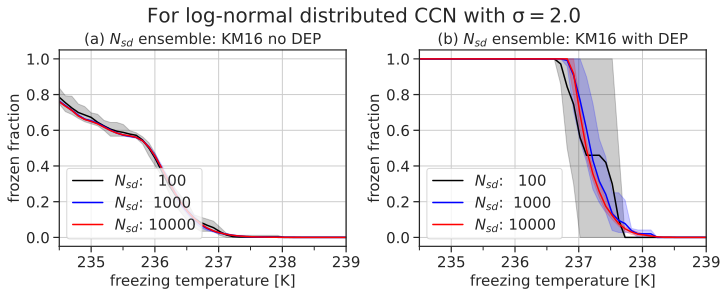

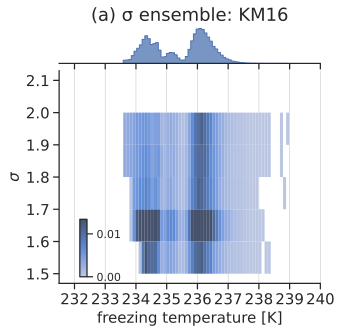

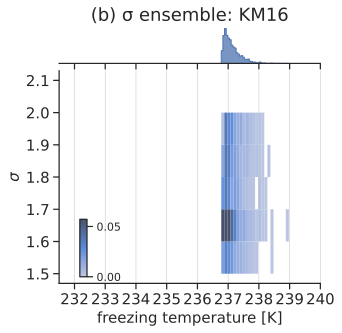

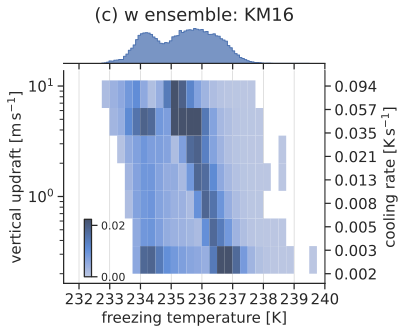

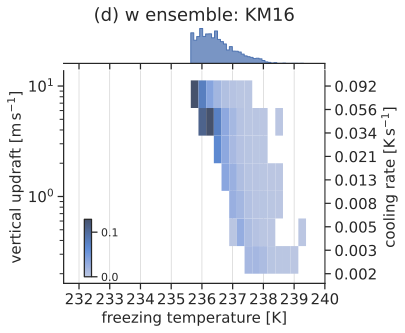

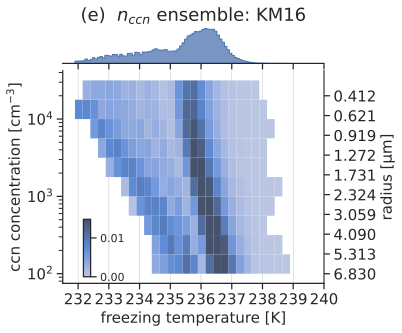

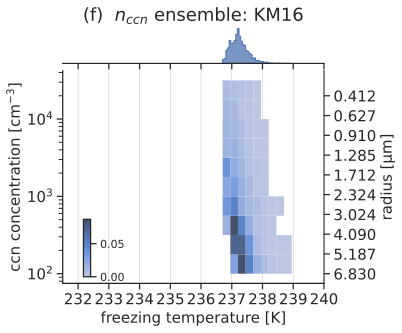

In [103]:
# Plot Figure 6 and Sup 3
fig_name = "fig_sup_3"
fig, axs = pyplot.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
fig.suptitle(r"For log-normal distributed CCN with $\mathrm{\sigma}=$"+str(standard["sigma_droplet_distribution"]),fontsize=20)

axs = axs.ravel()
axs[0] = plot.plot_freezing_temperatures_histogram_allinone(axs[0], nsd_ensemble_no_deposition_sig["KoopMurray2016"], title = r"(a) $N_{sd}$ ensemble: KM16 no DEP", lloc="lower left")
axs[1] = plot.plot_freezing_temperatures_histogram_allinone(axs[1], nsd_ensemble_deposition_sig["KoopMurray2016"], title = r"(b) $N_{sd}$ ensemble: KM16 with DEP", lloc="lower left")
show_plot(fig_name)

reload(plot)
fig_name = "fig6_"

plot.plot_freezing_temperatures_2d_histogram_seaborn(sig_ensemble_no_deposition_sig, "KoopMurray2016", title = r"(a) $\mathrm{\sigma}$ ensemble: KM16")
show_plot(fig_name+"a")

plot.plot_freezing_temperatures_2d_histogram_seaborn(sig_ensemble_deposition_sig, "KoopMurray2016", title = r"(b) $\mathrm{\sigma}$ ensemble: KM16")
show_plot(fig_name+"b")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_no_deposition_sig, "KoopMurray2016", title = "(c) w ensemble: KM16")
show_plot(fig_name+"c")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_deposition_sig, "KoopMurray2016", title = "(d) w ensemble: KM16")
show_plot(fig_name+"d")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_no_deposition_sig, "KoopMurray2016", title = r"(e)  $n_{ccn}$ ensemble: KM16")
show_plot(fig_name+"e")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_deposition_sig, "KoopMurray2016", title = r"(f)  $n_{ccn}$ ensemble: KM16")
show_plot(fig_name+"f")

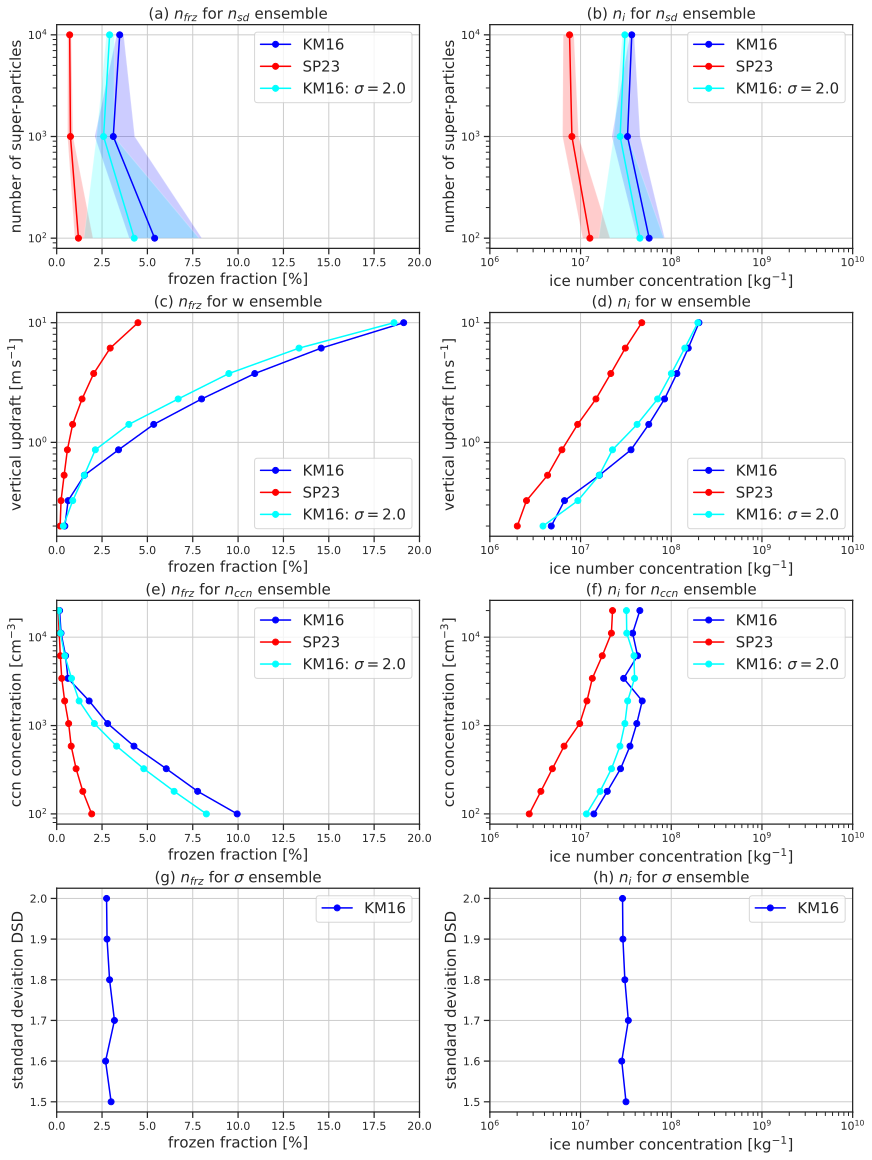

In [87]:
# Plot figure 5
reload(plot)
fig_name = "fig5"
fig, axs = pyplot.subplots(4, 2, figsize=(12, 16), constrained_layout=True)

plot_ensembles = [ [nsd_ensemble_deposition,nsd_ensemble_deposition_sig],
                   [updraft_ensemble_deposition, updraft_ensemble_deposition_sig],
                   [ccn_ensemble_deposition,ccn_ensemble_deposition_sig],
                   [sig_ensemble_deposition_sig],
                   ]
panel_labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]
axs = axs.ravel()
ix = 0
for plot_ensemble in plot_ensembles:

    axs[ix] = plot.plot_ensemble_bulk(axs[ix],plot_ensemble, "freezing_fraction", title_add=panel_labels[ix])
    ix += 1
    axs[ix] = plot.plot_ensemble_bulk(axs[ix],plot_ensemble, "ni", title_add=panel_labels[ix])
    ix += 1

show_plot(fig_name)

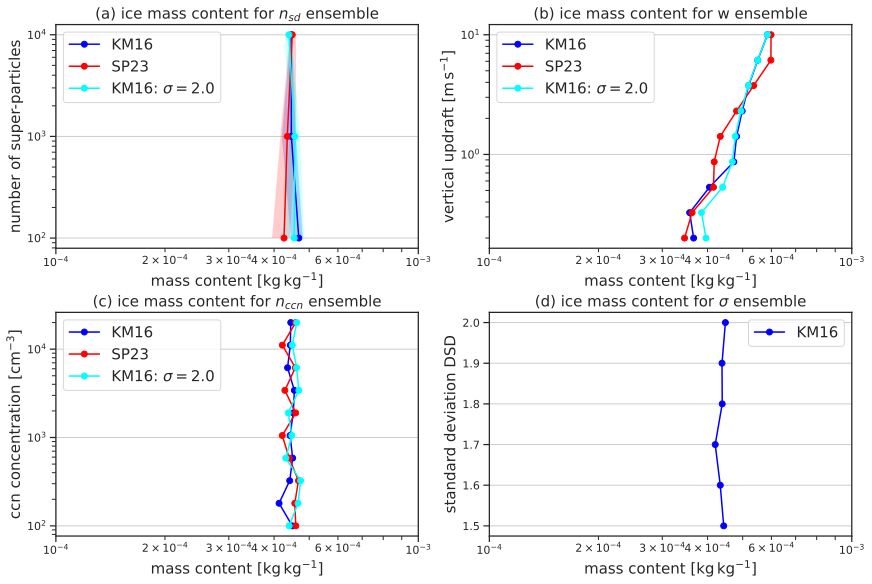

In [91]:
reload(plot)
fig_name = "fig_sup_4"
fig, axs = pyplot.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

plot_ensembles = [ [nsd_ensemble_deposition,nsd_ensemble_deposition_sig],
                   [updraft_ensemble_deposition, updraft_ensemble_deposition_sig],
                   [ccn_ensemble_deposition,ccn_ensemble_deposition_sig],
                   [sig_ensemble_deposition_sig],
                   ]
panel_labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]
axs = axs.ravel()
ix = 0
for plot_ensemble in plot_ensembles:

    axs[ix] = plot.plot_ensemble_bulk(axs[ix],plot_ensemble, "IWC", title_add=panel_labels[ix])
    ix += 1
show_plot(fig_name)